In [1]:
import pandas as pd

from kartezio.dataset import read_dataset
#from kartezio.apps.classification import create_classification_model
from kartezio.fitness import FitnessAP
from kartezio.inference import KartezioModel
from kartezio.easy import generate_python_class, show_graph
from numena.image.drawing import draw_overlay
import cv2
import numpy as np
from skimage.color import rgb2hsv

import cv2
from kartezio.dataset import RoiPolygonReader, DataItem, Dataset
import numpy as np
from numena.image.basics import image_new


[Kartezio - INFO] -  42 nodes registered.
[Kartezio - INFO] -  5 metrics registered.
[Kartezio - INFO] -  7 fitness registered.
[Kartezio - INFO] -  7 endpoints registered.
[Kartezio - INFO] -  5 stackers registered.


In [2]:
from pathlib import Path

base_path = Path('/data/elliot/test_pipeline/')

df = pd.read_csv(base_path / "dataset.csv")

In [3]:
# Will be overloaded by the other dataset if you run the next cell
dataset = read_dataset(base_path, preview=True)

### Run this cell only if you trained your model on multiple color spaces

In [4]:

roipolygonreader = RoiPolygonReader(base_path)

train_set = Dataset.SubSet(None)
test_set = Dataset.SubSet(None)

for raw in df.iterrows():

    str_ihc = (raw[1]['input'])
    str_he = str_ihc.replace("ihc", "he")
    
    if raw[1]['set'] == "testing":
        img_ihc = cv2.imread(str(base_path / str_ihc))
        img_ihc = cv2.cvtColor(img_ihc, cv2.COLOR_BGR2RGB)
        img_ihc_rgb = cv2.cvtColor(img_ihc, cv2.COLOR_BGR2RGB)

        img_ihc_hsv = cv2.cvtColor(img_ihc, cv2.COLOR_RGB2HSV)
        img_ihc_hed = rgb2hsv(img_ihc).astype(np.uint8)

        
        img_he = cv2.imread(str(base_path / str_he))
        img_he = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
        img_he_rgb = cv2.cvtColor(img_ihc, cv2.COLOR_BGR2RGB)

        img_he_hsv = cv2.cvtColor(img_he, cv2.COLOR_RGB2HSV)
        img_he_hed = rgb2hsv(img_he).astype(np.uint8)
        
                
        print(type(img_he_hed), type(img_he_hsv))
        print(img_he_hed.shape, img_he_hsv.shape)


        X = DataItem(datalist=list(cv2.split(img_ihc_rgb)) + list(cv2.split(img_ihc_hsv)) + list(cv2.split(img_ihc_hed)) + list(cv2.split(img_he_rgb)) + list(cv2.split(img_he_hsv))  + list(cv2.split(img_he_hed)), # Ici rajouter des conversions HSV etc
                    shape=img_ihc.shape[:2],
                    count=1,
                    visual=img_ihc_rgb)
        
        label = (raw[1]['label'])
        
        if isinstance(label, float):
            label_mask = image_new(img_ihc.shape[:2])
            label = ""
            Y = [label_mask]
        else:
            Y = roipolygonreader.read(Path(label), shape=img_ihc.shape[:2])
            Y = Y.datalist
            
        test_set.add_item(X.datalist, Y)
        test_set.add_visual(img_ihc_rgb)
        
    
    if raw[1]['set'] == "training":
        
        img_ihc = cv2.imread(str(base_path / str_ihc))
        img_ihc = cv2.cvtColor(img_ihc, cv2.COLOR_BGR2RGB)
        img_ihc_rgb = cv2.cvtColor(img_ihc, cv2.COLOR_BGR2RGB)

        img_ihc_hsv = cv2.cvtColor(img_ihc, cv2.COLOR_RGB2HSV)
        img_ihc_hed = rgb2hsv(img_ihc).astype(np.uint8)

        
        img_he = cv2.imread(str(base_path / str_he))
        img_he = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
        img_he_rgb = cv2.cvtColor(img_ihc, cv2.COLOR_BGR2RGB)

        img_he_hsv = cv2.cvtColor(img_he, cv2.COLOR_RGB2HSV)
        img_he_hed = rgb2hsv(img_he).astype(np.uint8)
        
        print(img_he_hed.dtype, img_he_hsv.dtype)
        print(img_he_hed.shape, img_he_hsv.shape)

        
        label = (raw[1]['label'])
        
        if isinstance(label, float):
            label_mask = image_new(img_ihc.shape[:2])
            label = ""
            Y = [label_mask]
        else:
            Y = roipolygonreader.read(Path(label), shape=img_ihc.shape[:2])
            Y = Y.datalist
            
        X = DataItem(datalist=list(cv2.split(img_ihc_rgb)) + list(cv2.split(img_ihc_hsv)) + list(cv2.split(img_ihc_hed)) + list(cv2.split(img_he_rgb)) + list(cv2.split(img_he_hsv))  + list(cv2.split(img_he_hed)), # Ici rajouter des conversions HSV etc
                shape=img_ihc.shape[:2],
                count=1,
                visual=img_he)
        if img_ihc.shape[0] > 300 or img_ihc.shape[1] > 300: #Pour gagner du temps et virer les grosses images
           continue
        train_set.add_item(X.datalist, Y)
        train_set.add_visual(img_ihc_rgb)
    

dataset = Dataset(train_set=train_set,
                  test_set=test_set,
                  name='Train_set',
                  label_name='Mitoses',
                  inputs=18)


uint8 uint8
(63, 60, 3) (63, 60, 3)
uint8 uint8
(71, 60, 3) (71, 60, 3)
uint8 uint8
(51, 56, 3) (51, 56, 3)
uint8 uint8
(59, 63, 3) (59, 63, 3)
uint8 uint8
(61, 52, 3) (61, 52, 3)
uint8 uint8
(57, 63, 3) (57, 63, 3)
uint8 uint8
(47, 61, 3) (47, 61, 3)
uint8 uint8
(58, 66, 3) (58, 66, 3)
uint8 uint8
(71, 64, 3) (71, 64, 3)
uint8 uint8
(59, 51, 3) (59, 51, 3)
uint8 uint8
(60, 72, 3) (60, 72, 3)
uint8 uint8
(52, 56, 3) (52, 56, 3)
uint8 uint8
(52, 53, 3) (52, 53, 3)
uint8 uint8
(60, 73, 3) (60, 73, 3)
uint8 uint8
(52, 54, 3) (52, 54, 3)
uint8 uint8
(48, 49, 3) (48, 49, 3)
uint8 uint8
(43, 43, 3) (43, 43, 3)
uint8 uint8
(34, 42, 3) (34, 42, 3)
uint8 uint8
(49, 45, 3) (49, 45, 3)
uint8 uint8
(47, 65, 3) (47, 65, 3)
uint8 uint8
(42, 38, 3) (42, 38, 3)
uint8 uint8
(49, 59, 3) (49, 59, 3)
uint8 uint8
(63, 58, 3) (63, 58, 3)
uint8 uint8
(53, 56, 3) (53, 56, 3)
uint8 uint8
(50, 54, 3) (50, 54, 3)
uint8 uint8
(45, 51, 3) (45, 51, 3)
uint8 uint8
(46, 51, 3) (46, 51, 3)
uint8 uint8
(39, 45, 3) (39,

### Back to the regular path

In [5]:
ITERATIONS = 100
LAMBDA = 5
fitness=FitnessAP(thresholds=0.5)
#preprocessing = TransformToHED()
preprocessing = None

In [6]:
"""
This cell first run the inference of the model on the training data, and then on the test data
"""

# Here you put the path to the model you trained in the other scripts
model_path = r"./843651-da9927f8-2579-43a1-9ae5-d3bda5c12ebd/elite.json"

model_seg = KartezioModel(model_path, fitness=fitness)
train_x = dataset.train_x
test_x = dataset.test_x

p, t = model_seg.predict(train_x)
#f = fitness.compute_one(dataset.train_y, p)
#print(f)

# Training data
for i, pi in enumerate(p):
    # We limit to the first 100 data, so the folder is not overloaded
    if i < 100:
        image_rgb = dataset.train_v[i]
        mask_overlay = draw_overlay(
            image_rgb.copy(), p[i]["labels"].astype(np.uint8), [255, 0, 255], alpha=0.5, thickness=2
        )
        cv2.imwrite(f"./output_kartezio_double/output_{i}.png", cv2.cvtColor(mask_overlay, cv2.COLOR_BGR2RGB))


# Test data
p, t = model_seg.predict(test_x)

for i, pi in enumerate(p):
    image_rgb = dataset.test_v[i]
    mask_overlay = draw_overlay(
        image_rgb.copy(), p[i]["labels"].astype(np.uint8), [255, 0, 0], alpha=0.5, thickness=2
    )
    cv2.imwrite(f"./output_kartezio_double/output_test_{i}.png", cv2.cvtColor(mask_overlay, cv2.COLOR_BGR2RGB))


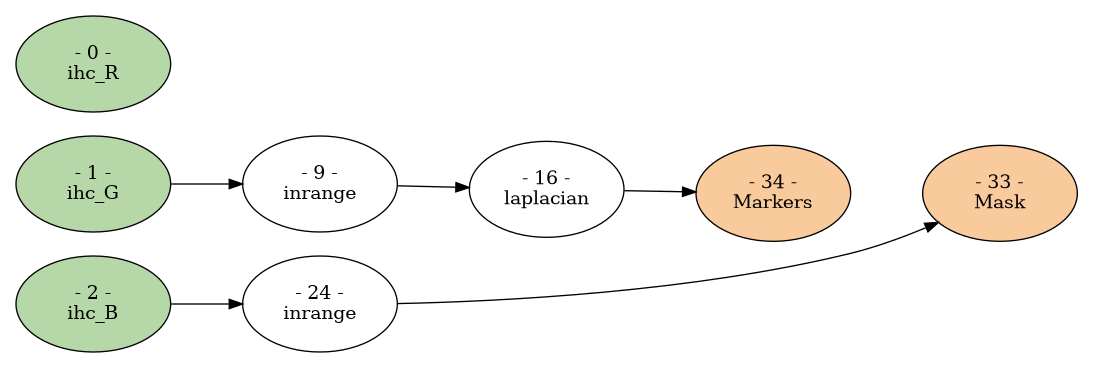

In [7]:
# Shows a graph explaning how each chanel is used by the model

show_graph(model_seg._model, ["ihc_R", "ihc_G", "ihc_B", "ihc_H", "ihc_S", "ihc_V", "he_R", "he_G", "he_B", "he_H", "he_S", "he_V"], ["Mask", "Markers"], jupyter=True)
#show_graph(model_seg._model, ["ihc_R", "ihc_G", "ihc_B", "ihc_H", "ihc_S", "ihc_V", 'ihc_H', 'ihc_E', 'ihc_D', "he_R", "he_G", "he_B", "he_H", "he_S", "he_V", 'he_H', 'he_E', 'he_D'], ["Mask", "Markers"], jupyter=True)

In [8]:
# Write python code associated to the model

MODEL_WGA = "843651-da9927f8-2579-43a1-9ae5-d3bda5c12ebd"
generate_python_class(f"./{MODEL_WGA}/elite.json", "ModelWGA")


# ============================== GENERATED CODE TO COPY ================================
from kartezio.inference import CodeModel
from kartezio.endpoint import EndpointWatershed



class ModelWGA(CodeModel):
    def __init__(self):
        super().__init__(endpoint=EndpointWatershed(**{'use_dt': False, 'markers_distance': 21, 'markers_area': None}))


    def _parse(self, X):
        x_1 = X[1]
        x_2 = X[2]
        node_9 = self.call_node("inrange", [x_1], [174, 19])
        node_16 = self.call_node("laplacian", [node_9], [130, 205])
        node_24 = self.call_node("inrange", [x_2], [14, 207])
        y_0 = node_24
        y_1 = node_16
        Y = [y_0, y_1]
        return Y

# ======================================================================================


In [9]:
testing_df = df[df['set'] == 'testing']


In [10]:
testing_df

,input,label,set
15422,21I000109-1-13-21_095813/2/ihc_crop.png,NaN,testing
15423,21I000109-1-13-21_095813/0/ihc_crop.png,NaN,testing
15424,21I000109-1-13-21_095813/1/ihc_crop.png,NaN,testing
15425,21I000109-1-13-21_095813/3/ihc_crop.png,NaN,testing
15426,21I000186-1-15-21_153809/2/ihc_crop.png,NaN,testing
15427,21I000186-1-15-21_153809/0/ihc_crop.png,NaN,testing
15428,21I000186-1-15-21_153809/1/ihc_crop.png,NaN,testing
15429,21I000186-1-15-21_153809/4/ihc_crop.png,NaN,testing
15430,21I000186-1-15-21_153809/3/ihc_crop.png,NaN,testing
15431,21I000728-1-10-21_141128/2/ihc_crop.png,NaN,testing


In [23]:
def extract_output_number(df):
    testing_df = df[df['set'] == 'testing']
    input_values = testing_df["input"]
    list_inputs = input_values.tolist()
    list_tuple_inputs = []
    for inp in list_inputs:
        split = inp.split("/")
        patch_number = split[1]
        slide_id = split[0].split("-")[0]
        list_tuple_inputs.append((slide_id, patch_number))
    return list_tuple_inputs

In [25]:
list_tuple_inputs = extract_output_number(df)